<a href="https://colab.research.google.com/github/girdhar4/Stock-Market-Prediction-/blob/main/StockMarketPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Description: This program uses an artificial recurrent neural network called Long Short Term Memmory (LSTM)
# to predict the closing stock price of a corporation(Apple Inc.) 

In [ ]:
#Import the libraries
import math
import numpy as np
import pandas as pd
import io
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from pandas_datareader.data import DataReader
from datetime import datetime
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

In [ ]:
#Reading the file from device

from google.colab import files
uploaded = files.upload()


Saving AMZN.csv to AMZN.csv


In [ ]:
#Get the stock quote
df = pd.read_csv(io.BytesIO(uploaded['AMZN.csv']))
df['Date'] = pd.to_datetime(df.Date)
df=df.set_index('Date')
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
...,...,...,...,...,...,...
2021-07-01,3434.610107,3457.000000,3409.419922,3432.969971,3432.969971,2037100
2021-07-02,3451.639893,3511.719971,3436.919922,3510.979980,3510.979980,3169400
2021-07-06,3530.110107,3685.479980,3529.000000,3675.739990,3675.739990,6744800


In [ ]:
#Get the number of rows and columns in the dataset
df.shape
#Taking the data from last 5 years

(6077, 6)

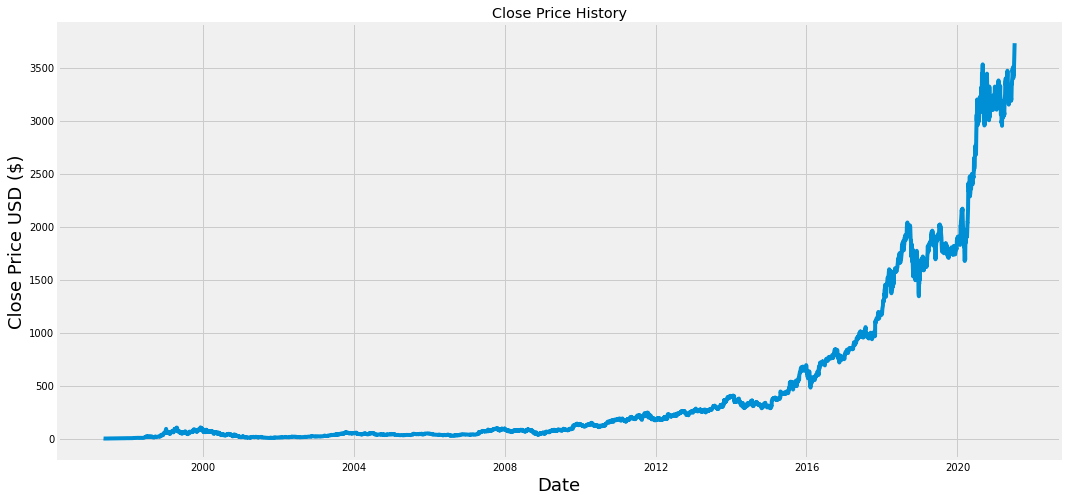

In [ ]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
#Create a new dataframe with only the 'Close' cloumn
data_close= df.filter(['Close'])
#Converted the dataframe to a numpy array
dataset=data_close.values
#Get the number of rows to train the model 
training_data_len = math.ceil(len(dataset) * .8) #Training dataset- 80%
print(training_data_len) #Length of training dataset

4862


In [ ]:
#Pre-processing the Input Data
#Scale the data
scaler = MinMaxScaler(feature_range = (0,1)) 
#Transforming the value between 0 and 1
scaled_data = scaler.fit_transform(dataset) #Min and Max values to be used for scaling 
scaled_data

array([[1.50803720e-04],
       [8.93653463e-05],
       [8.37798446e-05],
       ...,
       [9.85075144e-01],
       [9.90662278e-01],
       [1.00000000e+00]])

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
train_data
# Split the data into x_train and y_train data sets
x_train = [] # Independent Variable
y_train = [] # Target Variable

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i,0]) # 0-59 values 
  y_train.append(train_data[i,0]) # 61st value

In [ ]:
# Convert the x_train and y_train to numpy arrays
x_train , y_train = np.array(x_train), np.array(y_train)

In [ ]:
# Reshape the data - converting it to 3D for LSTM Model
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(4802, 60, 1)

In [ ]:
# Build the LSTM Model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape =(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(30))
model.add(Dense(1))

In [ ]:
# Compile the model
model.compile(optimizer = "adam", loss = "mean_squared_error")


In [ ]:
# Train the model
model.fit(x_train, y_train, batch_size =1, epochs=1)

4802/4802 [==============================] - 161s 33ms/step - loss: 1.1900e-04


In [ ]:
# Create the testing dataset
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] # Values which we want our model to predict

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i , 0])


In [ ]:
# Convert the data to a numpy array
x_test = np.array(x_test)

In [ ]:
# Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.110000306941228

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


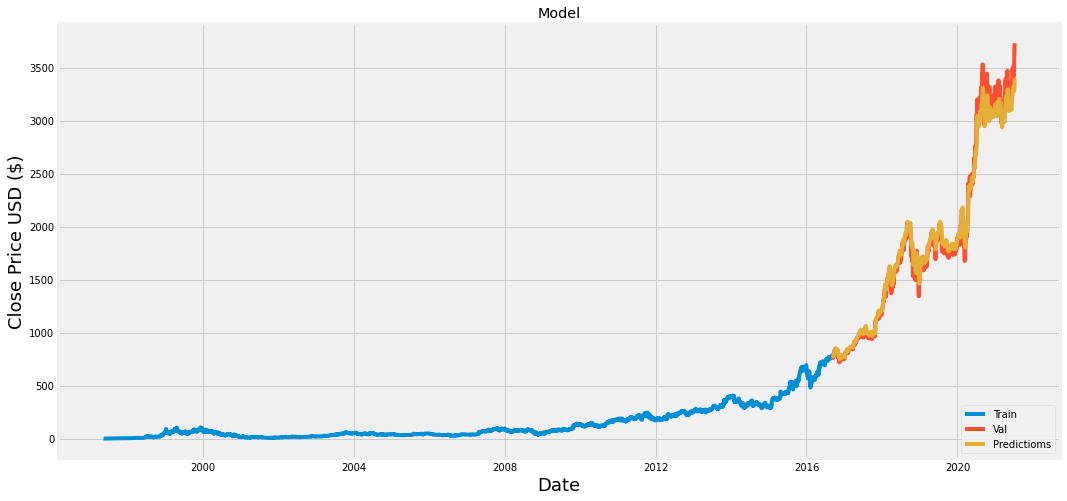

In [ ]:
# Plot the data
train = data_close[:training_data_len]
valid = data_close[training_data_len:]
valid['Predictions'] = predictions

# Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictioms'], loc = 'lower right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2016-09-09,760.140015,806.985962
2016-09-12,771.489990,799.942932
2016-09-13,761.010010,796.780396
2016-09-14,761.090027,792.145203
2016-09-15,769.690002,788.754150
...,...,...
2021-07-01,3432.969971,3357.353760
2021-07-02,3510.979980,3355.228027
2021-07-06,3675.739990,3377.065186


In [ ]:
# Get the quote
amzn_quote = pd.read_csv(io.BytesIO(uploaded['AMZN.csv']))
# Create a new Dataframe
new_df = amzn_quote.filter(['Close'])
# Get the last 60 days of closing price value and convert the dataframe to an array
last_60_days= new_df[-60:].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list
X_test = []
#Append the last 60 days
X_test.append(last_60_days_scaled)
# Convert X_test to numpy array
X_test = np.array(X_test)
# Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
# Get the predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price) # Price predicted for the next day - 2021/07/09

[[3448.619]]
